# Pymaceuticals Inc.
---

### Analysis

- On review of the data, only a single mouse had duplicate entries, the mouse data was removed for analysis.
- Of all the drugs tested, most data existed for those treated with Capomulin and Ramicane, the least data was available for Propriva. There are no notes to explain why this might be the case. It could be hypothesized these are potentially less toxic or more efficacious at dealing with tumours, hence increased survivability and more measurements being available. However we do not know the outcomes for each of the mice such as reason for removal from study.
- Mice gender was distributed evenly for testing.
- Capomulin and Ramicane groups in particular, appeared to show lower average tumour size, which may be attributable directly to their drug effect on SCC tumours.

- On further evaluation of Capomulin, Ramicane, Infubinol, and Ceftamin there were findings of:
  - Overall reduced tumour volumes at the end time point in the study for Capomulin and Ramicane vs Infubinol and Ceftamin. This may reflect increased antitumour activity.
  - On further evaluation of Capomulin it would appear there may be a maximal time benefit of approximately 35days, after which tumour volume may start to increase again. This may indicate that the treatment efficacy with Capomulin may wear off over time.
  - Furthermore, it would appear within the Capomulin test mice, heavier mice had larger tumours. It is unclear if this is due to the mass of the tumour, or if there is another process causing increased weight gain secondary to the tumour itself.  This should be further interrogated, to ensure no differential in response to Capomulin.

In [127]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_combined = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")

# Display the data table for preview
study_combined

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [128]:
# Checking the number of mice.
unique_mice = study_combined["Mouse ID"].unique()
num_mice = len(unique_mice)
print(num_mice)

249


In [129]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
dup_mice = study_combined.loc[study_combined.duplicated(subset=["Mouse ID", "Timepoint",]), "Mouse ID"].unique()
print(dup_mice)

['g989']


In [130]:
# Optional: Get all the data for the duplicate mouse ID.
dup_mice_df = study_combined.loc[study_combined["Mouse ID"] == "g989", :]
dup_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [131]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = study_combined.drop(study_combined[study_combined["Mouse ID"] == "g989"].index)

cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [132]:
# Checking the number of mice in the clean DataFrame.
unique_mice2 = cleaned_df["Mouse ID"].unique()
num_mice2 = len(unique_mice2)
print(num_mice2)

248


## Summary Statistics

In [133]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

# group by drug
grouped_drug = cleaned_df.groupby(cleaned_df["Drug Regimen"])

# do mean/median/var/stdev/sem of tumour volume
mean = grouped_drug["Tumor Volume (mm3)"].mean()
median = grouped_drug["Tumor Volume (mm3)"].median()
var = grouped_drug["Tumor Volume (mm3)"].var()
stdev = grouped_drug["Tumor Volume (mm3)"].std()
sem = grouped_drug["Tumor Volume (mm3)"].sem()

# make a new df
summary_df = pd.DataFrame({"Mean Tumor Volume":mean, 
                           "Median Tumor Volume":median, 
                           "Tumor Volume Variance":var, 
                           "Tumor Volume Std. Dev.":stdev, 
                           "Tumor Volume Std. Err.":sem})
# print df
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [134]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line 
aggregate_df =  cleaned_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])
aggregate_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Data Points collected per Drug in Study')

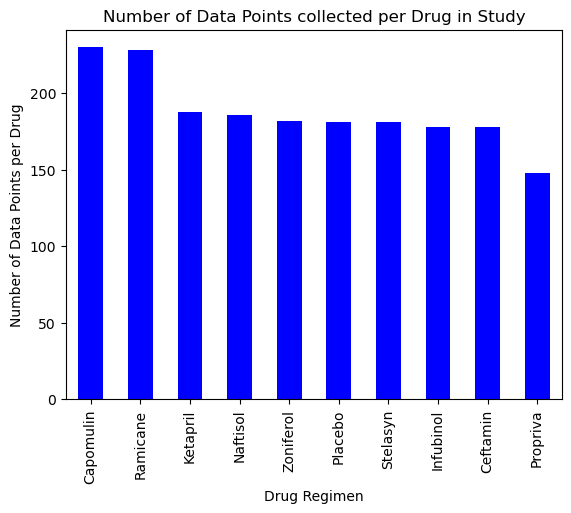

In [135]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Number of rows per drug
observations = cleaned_df["Drug Regimen"].value_counts()

# Create a Pandas bar plot based off of the group series from before and label the title
observations.plot.bar(color='b')  

# Set the xlabel, ylabel, and title using class methods
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Data Points per Drug")
plt.title("Number of Data Points collected per Drug in Study")



<function matplotlib.pyplot.show(close=None, block=None)>

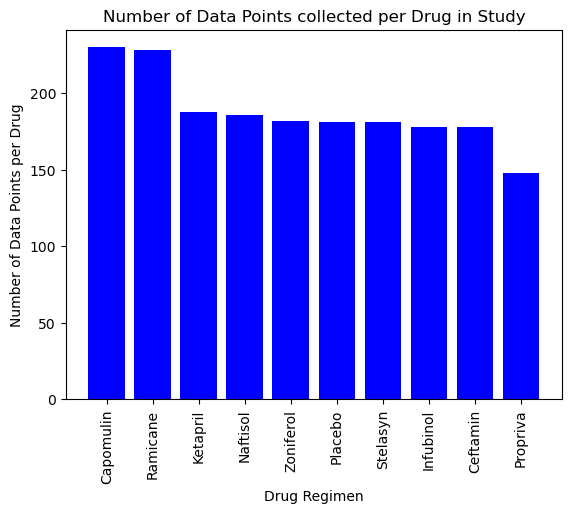

In [136]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Set the xlabel, ylabel, and title using class methods
plt.bar(drug_name, observations, color="b", align="center")

plt.xlabel("Drug Regimen")

drug_name = np.arange(len(observations))
tick_locations = [value for value in drug_name]
plt.xticks(tick_locations, observations.index.values, rotation=90)
plt.ylabel("Number of Data Points per Drug")
plt.title("Number of Data Points collected per Drug in Study")
plt.show

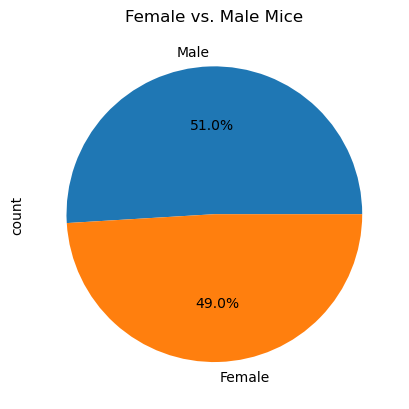

In [137]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_df = cleaned_df["Sex"].value_counts()
gender_df

# Make the pie chart
plt.title("Female vs. Male Mice")
gender_df.plot.pie(autopct= "%1.1f%%")
plt.show()

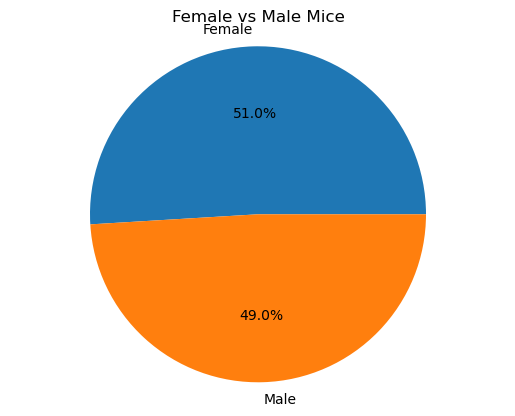

In [138]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_df = cleaned_df["Sex"].value_counts()
gender_df

# Make the pie chart
labels = ['Female', 'Male']
sizes = [958, 922]
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.title("Female vs Male Mice")
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [139]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_tp_df = cleaned_df.groupby(["Mouse ID"])["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_tp_df = pd.merge(greatest_tp_df, cleaned_df, on=["Mouse ID","Timepoint"], how="left")
max_tp_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [140]:
# Put treatments into a list for for loop (and later for plot labels)
drug = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumour_vol = []

#loop
for drug in drug:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes & add to new list
    drug_only_df = max_tp_df.loc[max_tp_df["Drug Regimen"] == drug,:]
    tumour_list_values = drug_only_df["Tumor Volume (mm3)"]
    tumour_vol.append(tumour_list_values)

    # Calculate the IQR and quantitatively determine if there are any potential outliers.
    quartiles = tumour_list_values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)   
    outlier_df = drug_only_df.loc[(drug_only_df["Tumor Volume (mm3)"] <= lower_bound) | (drug_only_df["Tumor Volume (mm3)"] >= upper_bound)]
    num_outlier = outlier_df["Mouse ID"].count()
    outlier_vol = outlier_df["Tumor Volume (mm3)"]
    
    print(f"{drug}'s has {num_outlier} potential outlier(s). The outlier(s): {outlier_vol}")


Capomulin's has 0 potential outlier(s). The outlier(s): Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's has 0 potential outlier(s). The outlier(s): Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's has 1 potential outlier(s). The outlier(s): 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's has 0 potential outlier(s). The outlier(s): Series([], Name: Tumor Volume (mm3), dtype: float64)


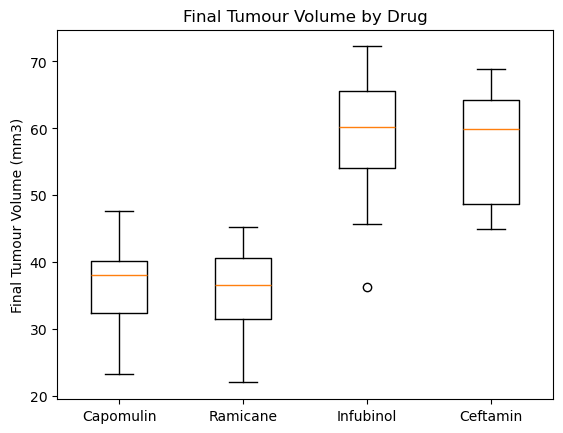

In [141]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()
ax1.boxplot(tumour_vol)
ax1.set_title("Final Tumour Volume by Drug")
ax1.set_ylabel("Final Tumour Volume (mm3)")
drug_names = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
plt.xticks([1, 2, 3, 4], drug_names)
plt.show()


## Line and Scatter Plots

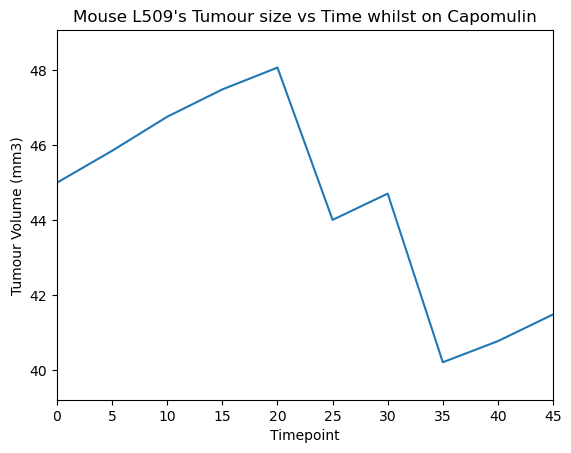

In [142]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

#isolate mouse l509's data
mouse_l509 = cleaned_df.loc[cleaned_df["Mouse ID"] == "l509",:]
mouse_l509

# Set the chart labels
plt.title("Mouse L509's Tumour size vs Time whilst on Capomulin")
plt.ylabel("Tumour Volume (mm3)")
plt.xlabel("Timepoint")
plt.xlim(0,45)
plt.ylim(mouse_l509["Tumor Volume (mm3)"].min()-1,mouse_l509["Tumor Volume (mm3)"].max()+1)

plt.plot(mouse_l509["Timepoint"],mouse_l509["Tumor Volume (mm3)"])


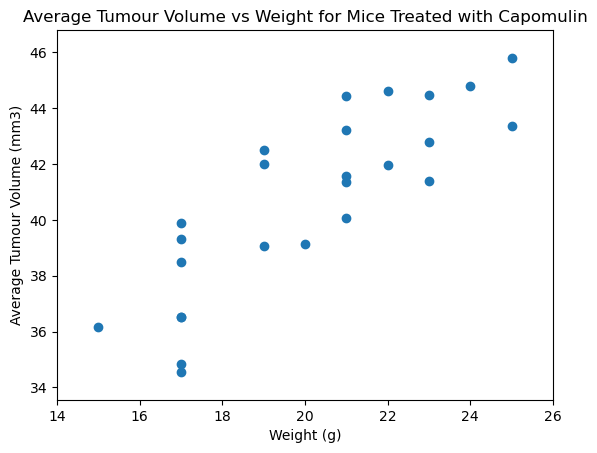

In [145]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin",:]
cap_group_mean_tvol = capomulin_df.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
cap_group_weight = capomulin_df.groupby(["Mouse ID"])["Weight (g)"].mean()

# scatter graph
plt.scatter(cap_group_weight, cap_group_mean_tvol)
plt.title("Average Tumour Volume vs Weight for Mice Treated with Capomulin")
plt.ylabel("Average Tumour Volume (mm3)")
plt.xlabel("Weight (g)")
plt.ylim(cap_group_mean_tvol.values.min()-1,cap_group_mean_tvol.values.max()+1)
plt.xlim(cap_group_weight.values.min()-1,cap_group_weight.values.max()+1)

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


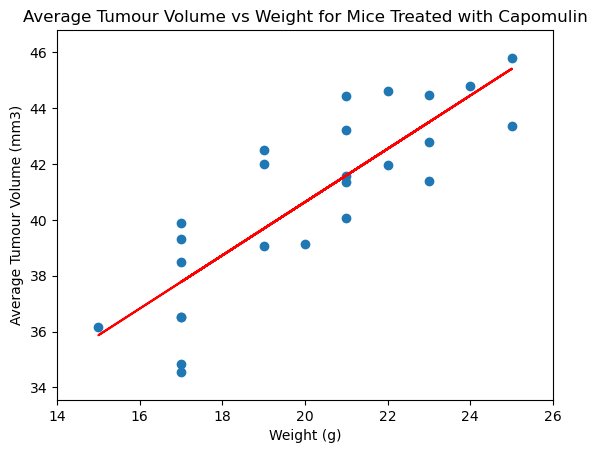

In [157]:
# Calculate the correlation coefficient and a linear regression model


# for mouse weight and average observed tumor volume for the entire Capomulin regimen
c_slope, c_int, c_r, c_p, c_std_err = st.linregress(cap_group_weight, cap_group_mean_tvol)
c_fit = c_slope * cap_group_weight + c_int

# print statement as specified (pearsons calc)
print(f"The correlation between mouse weight and the average tumor volume is {round(st.pearsonr(cap_group_weight,cap_group_mean_tvol)[0],2)}")

# scatter with line
plt.scatter(cap_group_weight, cap_group_mean_tvol)
plt.plot(cap_group_weight, c_fit, "-", color="r")
plt.title("Average Tumour Volume vs Weight for Mice Treated with Capomulin")
plt.ylabel("Average Tumour Volume (mm3)")
plt.xlabel("Weight (g)")
plt.ylim(cap_group_mean_tvol.values.min()-1,cap_group_mean_tvol.values.max()+1)
plt.xlim(cap_group_weight.values.min()-1,cap_group_weight.values.max()+1)

plt.show()